<a href="https://colab.research.google.com/github/Guhan2348519/ADVANCED-ML-tasks/blob/main/2348519_EX2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/data - data.csv')
data.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,02-05-2014 0:00,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,02-05-2014 0:00,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,02-05-2014 0:00,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,02-05-2014 0:00,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,02-05-2014 0:00,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64


In [10]:
from sklearn.preprocessing import LabelEncoder
numerical_cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_renovated']

for col in numerical_cols:
    data[col] = (data[col] - data[col].min()) / (data[col].max() - data[col].min())

X = data[['sqft_living', 'sqft_above', 'yr_built']]
y = data['price']
le = LabelEncoder()
y = le.fit_transform(data['price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred_nb = clf.predict(X_test)


mse_nb = mean_squared_error(y_test, y_pred_nb)
print('Mean squared error for Naive Bayes:', mse_nb)


knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

mse_knn = mean_squared_error(y_test, y_pred_knn)
print('Mean squared error for KNN:', mse_knn)

print('The Naive Bayes model has a mean squared error of {}.'.format(mse_nb))
print('The KNN model has a mean squared error of {}.'.format(mse_knn))

Mean squared error for Naive Bayes: 204714.52347826087
Mean squared error for KNN: 147139.80313043477
The Naive Bayes model has a mean squared error of 204714.52347826087.
The KNN model has a mean squared error of 147139.80313043477.


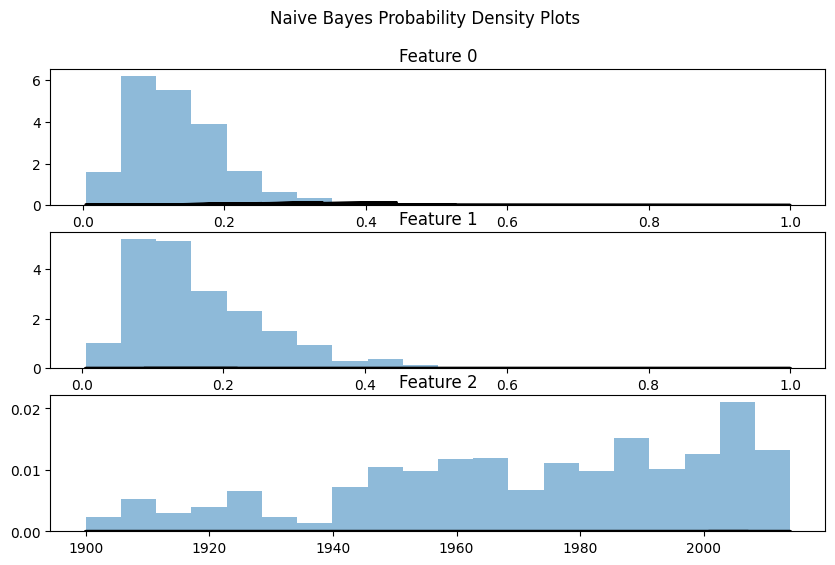

In [8]:
class_probabilities = clf.predict_proba(X_test)
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 6))

for i in range(3):
    axes[i].hist(X_test.iloc[:, i], bins=20, density=True, alpha=0.5)
    axes[i].plot(X_test.iloc[:, i], class_probabilities[:, i], color='black', linewidth=2)
    axes[i].set_title(f'Feature {i}')

plt.suptitle('Naive Bayes Probability Density Plots')
plt.show()